# Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [31]:
num_reviews = 300000

business = pd.read_parquet("data/" + str(num_reviews)+"_business.parquet")
user = pd.read_parquet("data/" + str(num_reviews)+"_user.parquet")
review = pd.read_parquet("data/" + str(num_reviews)+"_review.parquet")
checkin = pd.read_parquet("data/" + str(num_reviews)+"_checkin.parquet")

print("Number of businesses:", business.shape[0])
print("Number of users:     ", user.shape[0])
print("Number of reviews:   ", review.shape[0])
print("Number of check-ins: ", checkin.shape[0])

Number of businesses: 18166
Number of users:      202407
Number of reviews:    300000
Number of check-ins:  15504


## Processing the data

In [32]:
user.elite = user.elite.apply(lambda x: x.split(","))
user.friends = user.friends.apply(lambda x: x.split(","))

In [33]:
def remove_empty(x):
    if "" in x:
        x.remove("")
    return x

user.elite = user.elite.apply(remove_empty)
user.friends = user.friends.apply(remove_empty)

In [34]:
user['num_elite_years'] = user.elite.apply(lambda x: len(x))
user['num_friends'] = user.friends.apply(lambda x: len(x))
user.yelping_since = pd.to_datetime(user.yelping_since)

# Viewing some statistics

## Reviews

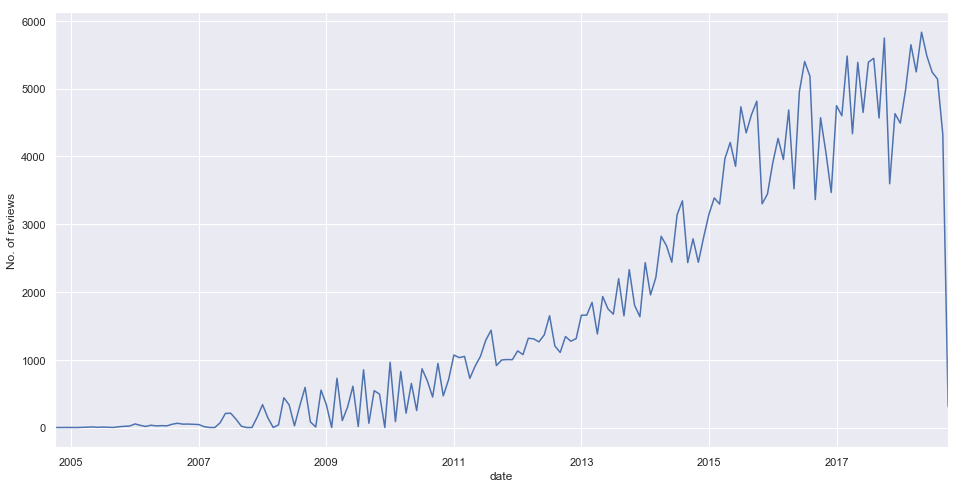

In [43]:
fig, ax = plt.subplots(figsize=(16, 8))
review.resample('W', on='date').size().plot()
_ = plt.ylabel("No. of reviews")

## Businesses

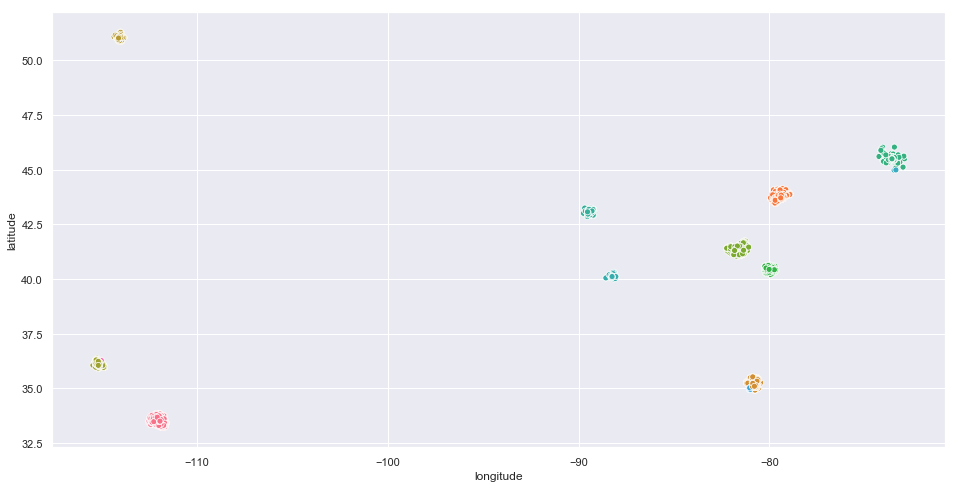

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))
_ = sns.scatterplot(x = business.longitude, y = business.latitude, hue=business.state, legend=False)

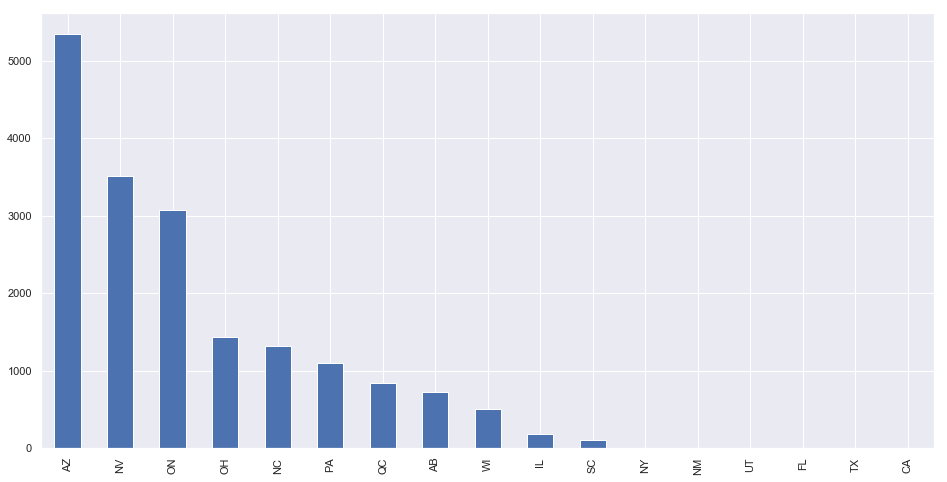

In [37]:
fig, ax = plt.subplots(figsize=(16, 8))
_ = business.state.value_counts().plot(kind='bar')

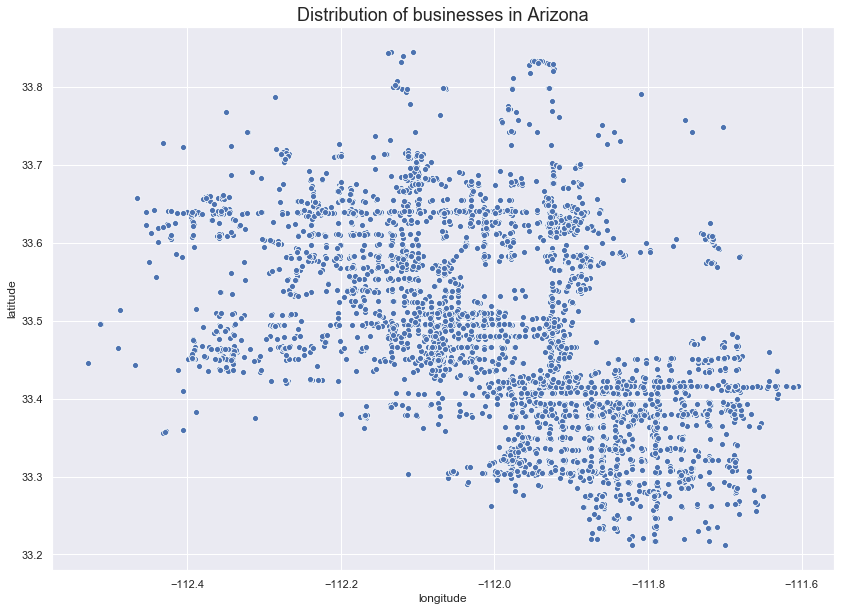

In [38]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.scatterplot(x = business[business.state == 'AZ'].longitude, y = business[business.state == 'AZ'].latitude)
_ = plt.title("Distribution of businesses in Arizona", fontsize="18")

## Users

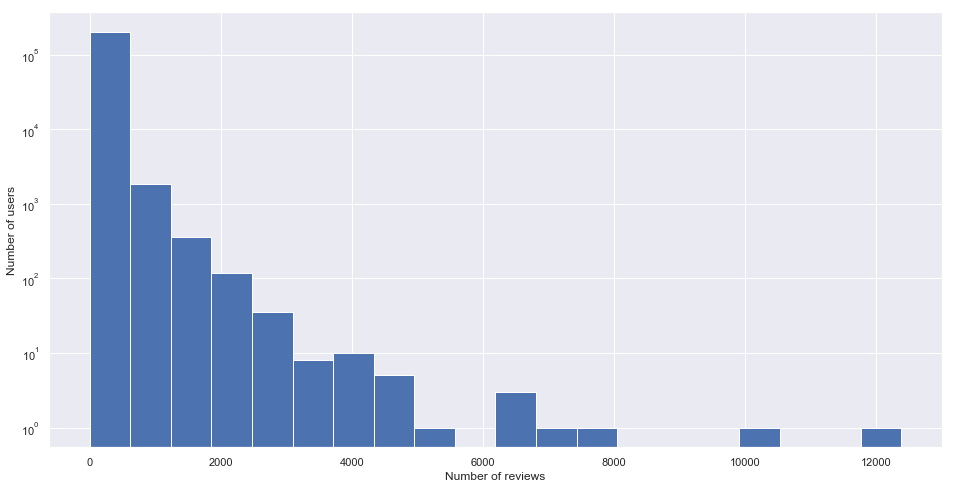

In [39]:
fig, ax = plt.subplots(figsize=(16, 8))
user.review_count.hist(bins=20)
plt.yscale("log")
plt.xlabel("Number of reviews")
_ = plt.ylabel("Number of users")

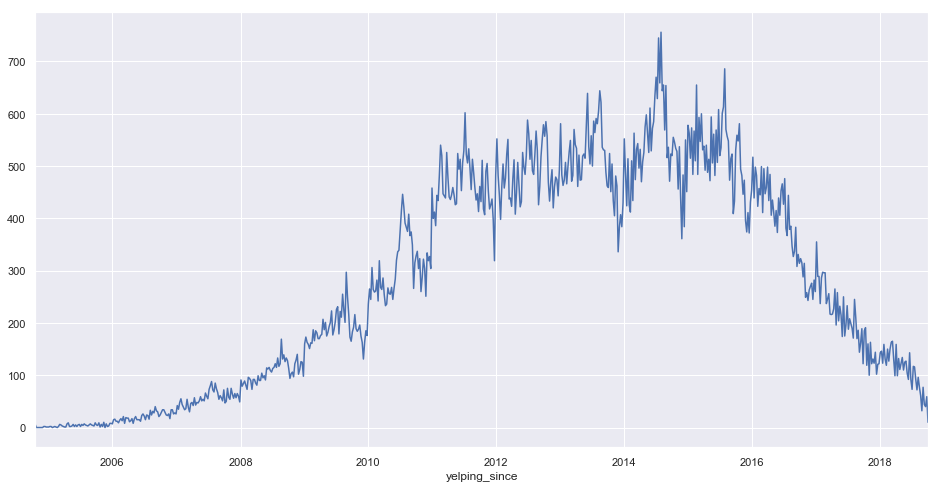

In [40]:
fig, ax = plt.subplots(figsize=(16, 8))
user.resample('W', on='yelping_since').size().plot()

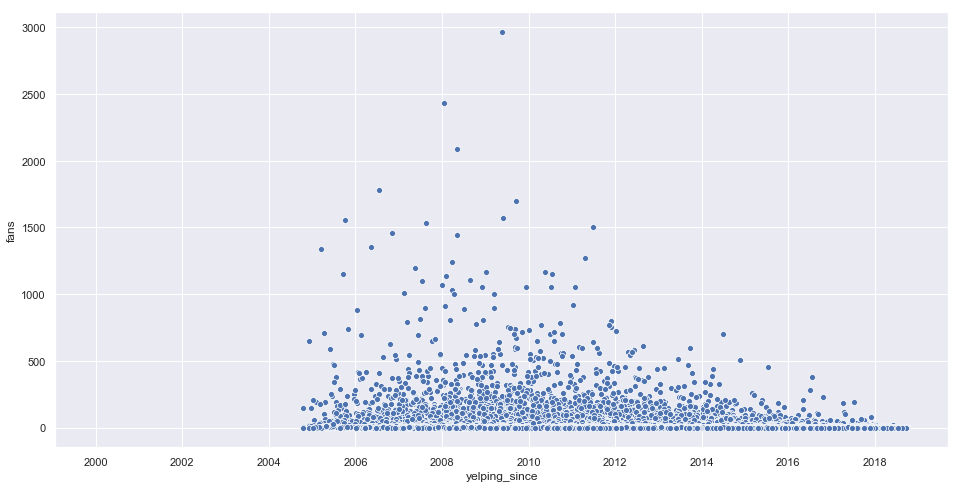

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
_ = sns.scatterplot(x = user.yelping_since, y = user.fans)

In [30]:
user.head()

,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_elite_years,num_friends
user_id,,,,,,,,,,,,,,,,,,,,,
xZAmw5gihOVO4duMN2Ju6Q,Flynn,70,2013-03-25 20:22:45,127,44,28,[],"[hRbdn-DZAuqYv88bezKrZQ, q3IYh428CVOkU_W90sM3...",0,3.21,...,0,0,2,6,0,0,0,0,0,96
yK_WOwDLP8c87hNXVWZBhg,J,10,2010-04-17 19:34:14,7,1,2,[],"[dQfQok80y8YNwkZCh99Yeg, zeH8s6mOs9b2X5Ae2knh...",1,3.42,...,0,0,3,0,0,0,0,0,0,105
yMh4OF_Li2gJzE5rJ8oCbA,Mike,531,2010-08-16 01:47:53,1315,923,982,"[2012, 2013, 2014, 2015, 2016, 2017, 2018]","[JO8EVwN_AwYxhieTOgnXyQ, kJKiCzXG7TSsq-91XCPU...",45,3.92,...,0,1,44,49,88,88,49,10,7,351
lsLuVKmdh45yommr53zfRg,Penny,70,2014-05-21 23:54:26,60,12,22,[2017],"[ewkj5-77i6LVGo-5rqIdBw, 9gIfIWeSEkX2pfza7wJm...",1,3.65,...,0,0,0,0,1,1,1,0,1,214
UG4EKu13JRwzRix6ESINdg,Edward,1083,2009-06-05 16:32:55,2365,1013,1315,"[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]","[jZbVe9Imk2WZrhLtkrWdaQ, BOUsgSa-XWcb3s8-NqEu...",53,3.61,...,1,0,54,117,93,93,18,4,8,900
